In [ ]:
# https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

print("SADF")

In [1]:
import pandas as pd

In [16]:
data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data, orient='index', columns =["a", '2', '4', '7'])

,a,2,4,7
row_1,3,2,1,0
row_2,a,b,c,d


In [4]:
import numpy as np
np.random.normal(3, 2.5, size=(2, 4))
# array([[-4.49401501,  4.00950034, -1.81814867,  7.29718677],   # random
#        [ 0.39924804,  4.68456316,  4.99394529,  4.84057254]])  # random

array([[-2.55665646,  5.14685797,  4.82168538,  4.44203073],
       [ 5.28448494,  8.70549286,  5.5507688 ,  2.03334273]])

In [ ]:
# https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

In [ ]:
data = {'user1': [3, 2, 1, 0], 'user2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data, orient='index')

# user1 data updated 256 times in timeframe of 100 days 
# moving average rates? - past 60 dates number of updates
# compliance changes over time -- rate of compliance over time -- project compliance 

# data accessed 100 times 

In [18]:
td2 = pd.Timedelta(days=1)

td2

Timedelta('1 days 00:00:00')

In [22]:
pd.to_datetime('today') - pd.Timedelta(days=1)

Timestamp('2023-03-25 11:43:26.618035')

In [26]:
# 10 users:

data = {'user1': [pd.to_datetime('today'), pd.to_datetime('today') - pd.Timedelta(days=1), 50, 90 ], 
        'user2': [pd.to_datetime('today'), pd.to_datetime('today') - pd.Timedelta(days=2), 50, 90 ], 
}

data = pd.DataFrame.from_dict(data, orient='index', columns = [ "last_known_timestamp", "lastest_timestamp", "prev_compliance", "curr_compliance"])


In [29]:
data["period"] =  data['lastest_timestamp'] - data['last_known_timestamp']

In [39]:
def seconds_conversion(s):
  return -s.total_seconds()/(60*60)

# changed to hour:
data["period_seconds"] = data["period"].apply(seconds_conversion)

In [40]:
data

,last_known_timestamp,lastest_timestamp,prev_compliance,curr_compliance,period,period_seconds,rate
user1,2023-03-26 11:47:39.561058,2023-03-25 11:47:39.561362,50,90,-1 days +00:00:00.000304,24.0,0.046296
user2,2023-03-26 11:47:39.561575,2023-03-24 11:47:39.561692,50,90,-2 days +00:00:00.000117,48.0,0.023148


In [41]:
# expected time taken to get 100 %:



In [43]:
data["rate"] = (data["curr_compliance"] - data["prev_compliance"]) / data["period_seconds"]
data

,last_known_timestamp,lastest_timestamp,prev_compliance,curr_compliance,period,period_seconds,rate
user1,2023-03-26 11:47:39.561058,2023-03-25 11:47:39.561362,50,90,-1 days +00:00:00.000304,24.0,1.666667
user2,2023-03-26 11:47:39.561575,2023-03-24 11:47:39.561692,50,90,-2 days +00:00:00.000117,48.0,0.833333


In [44]:
data["projected"] = (100 - data['curr_compliance']) / data["rate"]
data

,last_known_timestamp,lastest_timestamp,prev_compliance,curr_compliance,period,period_seconds,rate,projected
user1,2023-03-26 11:47:39.561058,2023-03-25 11:47:39.561362,50,90,-1 days +00:00:00.000304,24.0,1.666667,6.0
user2,2023-03-26 11:47:39.561575,2023-03-24 11:47:39.561692,50,90,-2 days +00:00:00.000117,48.0,0.833333,12.0


based on number of times resident's data gets updated in system

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

data = pd.read_csv('clustering.csv')
data.head()

In [ ]:
set1 = [20, 40, 50, 70, 100, 200]
set2 = [223, 111, 100, 75, 50, 10]

In [58]:
# data2 = {'user1': [50, ], 
#         'user2': [70 ], 
# }
data2 = {}
import random
set1 = [20, 40, 50, 70, 100, 200]
set2 = [223, 111, 100, 75, 50, 10]
num = 0
for i in range(10):
  to_add = random.randint(0, 9)
  for j in range(len(set1)):
    num += 1
    updates_num = set1[j] + to_add
    profile_views_num = set2[j] + to_add
    data2["user" + str(num)] = [updates_num, profile_views_num]

# higher number of updates means higher compliance 
# higer number of profile views means lower compliance
data2 = pd.DataFrame.from_dict(data2, orient='index', columns = [ "updates", "profile views"])
data2

,updates,profile views
user1,25,228
user2,45,116
user3,55,105
user4,75,80
user5,105,55
user6,205,15
user7,22,225
user8,42,113
user9,52,102
user10,72,77


In [68]:
# dataframe to
data2.to_csv("web_activity_dataaset.csv")

In [59]:
data2.describe()

,updates,profile views
count,60.000000,60.000000
mean,84.400000,99.233333
std,59.750668,66.865249
min,20.000000,10.000000
25%,44.750000,54.750000
50%,64.500000,92.000000
75%,104.250000,115.250000
max,209.000000,232.000000


In [62]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data2)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,6.000000e+01,6.000000e+01
mean,-6.661338e-17,-1.110223e-17
std,1.008439e+00,1.008439e+00
min,-1.086908e+00,-1.345787e+00
25%,-6.691909e-01,-6.708825e-01
50%,-3.358613e-01,-1.090907e-01
75%,3.350174e-01,2.415579e-01
max,2.102930e+00,2.002342e+00


In [63]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=6, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [64]:
# inertia on the fitted data
kmeans.inertia_

0.32705539695071884

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'Inertia')

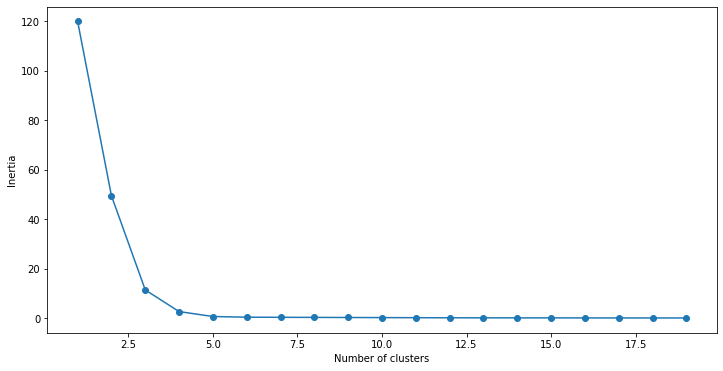

In [65]:

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [66]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans( n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [67]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

3    20
1    10
0    10
4    10
2    10
Name: cluster, dtype: int64

In [ ]:
dasf

In [47]:
eval_data = """{
  "data": [
    {
      "Evaluator": "Dr. Chan, Webber Pak Wo",
      "MCR_No": "M11367A",
      "Name_of_Evaluation_Form": "360",
      "Question": "PROFESSIONALISM",
      "Rotation_Period": "7/1/2022-7/31/2022",
      "Score": "5 (5)",
      "Service": "SHS-GASTRO:BASIC ENDO-SGH",
      "id": 1
    },
    {
      "Evaluator": "Dr. Chang, Jason Pik Eu",
      "MCR_No": "M65889A",
      "Name_of_Evaluation_Form": "REF",
      "Question": "PROFESSIONALISM",
      "Rotation_Period": "11/1/2022-11/30/2022",
      "Score": "7 (7)",
      "Service": "SHS-GRM:GERI-CGH",
      "id": 2
    },
    {
      "Evaluator": "Dr. Tan, Chee Kiat",
      "MCR_No": "M54354E",
      "Name_of_Evaluation_Form": "SPAM",
      "Question": "INTERPERSONAL & COMMUNICATION",
      "Rotation_Period": "11/1/2022-11/30/2022",
      "Score": "8 (8)",
      "Service": "SHS-IM:GEN MED-CGH",
      "id": 3
    },
    {
      "Evaluator": "Dr. Ooi, Chun How",
      "MCR_No": "M88791Z",
      "Name_of_Evaluation_Form": "C1",
      "Question": "MEDICAL KNOWLEDGE",
      "Rotation_Period": "12/1/2022-1/3/2023",
      "Score": "7 (7)",
      "Service": "SHS-GASTRO:GEN GASTROHEP-CGH",
      "id": 4
    },
    {
      "Evaluator": "Dr. Ooi, Chun How",
      "MCR_No": "M54354E",
      "Name_of_Evaluation_Form": "Mini-CEX",
      "Question": "MEDICAL KNOWLEDGE",
      "Rotation_Period": "12/1/2022-1/3/2023",
      "Score": "7 (7)",
      "Service": "SHS-GASTRO:GEN GASTROHEP-CGH",
      "id": 5
    },
    {
      "Evaluator": "Dr. Tan, Chee Kiat",
      "MCR_No": "M54354E",
      "Name_of_Evaluation_Form": "SPAM",
      "Question": "INTERPERSONAL & COMMUNICATION",
      "Rotation_Period": "11/1/2022-11/30/2022",
      "Score": "6 (8)",
      "Service": "SHS-IM:GEN MED-CGH",
      "id": 6
    }
  ]
}"""
eval_data

'{\n  "data": [\n    {\n      "Evaluator": "Dr. Chan, Webber Pak Wo",\n      "MCR_No": "M11367A",\n      "Name_of_Evaluation_Form": "360",\n      "Question": "PROFESSIONALISM",\n      "Rotation_Period": "7/1/2022-7/31/2022",\n      "Score": "5 (5)",\n      "Service": "SHS-GASTRO:BASIC ENDO-SGH",\n      "id": 1\n    },\n    {\n      "Evaluator": "Dr. Chang, Jason Pik Eu",\n      "MCR_No": "M65889A",\n      "Name_of_Evaluation_Form": "REF",\n      "Question": "PROFESSIONALISM",\n      "Rotation_Period": "11/1/2022-11/30/2022",\n      "Score": "7 (7)",\n      "Service": "SHS-GRM:GERI-CGH",\n      "id": 2\n    },\n    {\n      "Evaluator": "Dr. Tan, Chee Kiat",\n      "MCR_No": "M54354E",\n      "Name_of_Evaluation_Form": "SPAM",\n      "Question": "INTERPERSONAL & COMMUNICATION",\n      "Rotation_Period": "11/1/2022-11/30/2022",\n      "Score": "8 (8)",\n      "Service": "SHS-IM:GEN MED-CGH",\n      "id": 3\n    },\n    {\n      "Evaluator": "Dr. Ooi, Chun How",\n      "MCR_No": "M88791Z"

In [48]:
import json

eval_data = json.loads(eval_data)
eval_data = eval_data["data"]
eval_data

[{'Evaluator': 'Dr. Chan, Webber Pak Wo',
  'MCR_No': 'M11367A',
  'Name_of_Evaluation_Form': '360',
  'Question': 'PROFESSIONALISM',
  'Rotation_Period': '7/1/2022-7/31/2022',
  'Score': '5 (5)',
  'Service': 'SHS-GASTRO:BASIC ENDO-SGH',
  'id': 1},
 {'Evaluator': 'Dr. Chang, Jason Pik Eu',
  'MCR_No': 'M65889A',
  'Name_of_Evaluation_Form': 'REF',
  'Question': 'PROFESSIONALISM',
  'Rotation_Period': '11/1/2022-11/30/2022',
  'Score': '7 (7)',
  'Service': 'SHS-GRM:GERI-CGH',
  'id': 2},
 {'Evaluator': 'Dr. Tan, Chee Kiat',
  'MCR_No': 'M54354E',
  'Name_of_Evaluation_Form': 'SPAM',
  'Question': 'INTERPERSONAL & COMMUNICATION',
  'Rotation_Period': '11/1/2022-11/30/2022',
  'Score': '8 (8)',
  'Service': 'SHS-IM:GEN MED-CGH',
  'id': 3},
 {'Evaluator': 'Dr. Ooi, Chun How',
  'MCR_No': 'M88791Z',
  'Name_of_Evaluation_Form': 'C1',
  'Question': 'MEDICAL KNOWLEDGE',
  'Rotation_Period': '12/1/2022-1/3/2023',
  'Score': '7 (7)',
  'Service': 'SHS-GASTRO:GEN GASTROHEP-CGH',
  'id': 4},


In [49]:
eval_data

[{'Evaluator': 'Dr. Chan, Webber Pak Wo',
  'MCR_No': 'M11367A',
  'Name_of_Evaluation_Form': '360',
  'Question': 'PROFESSIONALISM',
  'Rotation_Period': '7/1/2022-7/31/2022',
  'Score': '5 (5)',
  'Service': 'SHS-GASTRO:BASIC ENDO-SGH',
  'id': 1},
 {'Evaluator': 'Dr. Chang, Jason Pik Eu',
  'MCR_No': 'M65889A',
  'Name_of_Evaluation_Form': 'REF',
  'Question': 'PROFESSIONALISM',
  'Rotation_Period': '11/1/2022-11/30/2022',
  'Score': '7 (7)',
  'Service': 'SHS-GRM:GERI-CGH',
  'id': 2},
 {'Evaluator': 'Dr. Tan, Chee Kiat',
  'MCR_No': 'M54354E',
  'Name_of_Evaluation_Form': 'SPAM',
  'Question': 'INTERPERSONAL & COMMUNICATION',
  'Rotation_Period': '11/1/2022-11/30/2022',
  'Score': '8 (8)',
  'Service': 'SHS-IM:GEN MED-CGH',
  'id': 3},
 {'Evaluator': 'Dr. Ooi, Chun How',
  'MCR_No': 'M88791Z',
  'Name_of_Evaluation_Form': 'C1',
  'Question': 'MEDICAL KNOWLEDGE',
  'Rotation_Period': '12/1/2022-1/3/2023',
  'Score': '7 (7)',
  'Service': 'SHS-GASTRO:GEN GASTROHEP-CGH',
  'id': 4},


In [50]:
eval_cols = list(eval_data[0].keys())
eval_cols

['Evaluator',
 'MCR_No',
 'Name_of_Evaluation_Form',
 'Question',
 'Rotation_Period',
 'Score',
 'Service',
 'id']

In [51]:
import pandas as pd
data = pd.DataFrame.from_records(eval_data, columns = eval_cols )
data

,Evaluator,MCR_No,Name_of_Evaluation_Form,Question,Rotation_Period,Score,Service,id
0,"Dr. Chan, Webber Pak Wo",M11367A,360,PROFESSIONALISM,7/1/2022-7/31/2022,5 (5),SHS-GASTRO:BASIC ENDO-SGH,1
1,"Dr. Chang, Jason Pik Eu",M65889A,REF,PROFESSIONALISM,11/1/2022-11/30/2022,7 (7),SHS-GRM:GERI-CGH,2
2,"Dr. Tan, Chee Kiat",M54354E,SPAM,INTERPERSONAL & COMMUNICATION,11/1/2022-11/30/2022,8 (8),SHS-IM:GEN MED-CGH,3
3,"Dr. Ooi, Chun How",M88791Z,C1,MEDICAL KNOWLEDGE,12/1/2022-1/3/2023,7 (7),SHS-GASTRO:GEN GASTROHEP-CGH,4
4,"Dr. Ooi, Chun How",M54354E,Mini-CEX,MEDICAL KNOWLEDGE,12/1/2022-1/3/2023,7 (7),SHS-GASTRO:GEN GASTROHEP-CGH,5
5,"Dr. Tan, Chee Kiat",M54354E,SPAM,INTERPERSONAL & COMMUNICATION,11/1/2022-11/30/2022,6 (8),SHS-IM:GEN MED-CGH,6


In [53]:
# (data['Service'].unique())
# (data['Rotation_Period'].unique())

array(['SHS-GASTRO:BASIC ENDO-SGH', 'SHS-GRM:GERI-CGH',
       'SHS-IM:GEN MED-CGH', 'SHS-GASTRO:GEN GASTROHEP-CGH'], dtype=object)

In [27]:
data["Score_processed"] = data["Score"].apply(lambda x: int(x[0]))
data

,Evaluator,MCR_No,Name_of_Evaluation_Form,Question,Rotation_Period,Score,Service,id,Score_processed
0,"Dr. Chan, Webber Pak Wo",M11367A,360,PROFESSIONALISM,7/1/2022-7/31/2022,5 (5),SHS-GASTRO:BASIC ENDO-SGH,1,5
1,"Dr. Chang, Jason Pik Eu",M65889A,REF,PROFESSIONALISM,11/1/2022-11/30/2022,7 (7),SHS-GRM:GERI-CGH,2,7
2,"Dr. Tan, Chee Kiat",M54354E,SPAM,INTERPERSONAL & COMMUNICATION,11/1/2022-11/30/2022,8 (8),SHS-IM:GEN MED-CGH,3,8
3,"Dr. Ooi, Chun How",M88791Z,C1,MEDICAL KNOWLEDGE,12/1/2022-1/3/2023,7 (7),SHS-GASTRO:GEN GASTROHEP-CGH,4,7
4,"Dr. Ooi, Chun How",M54354E,Mini-CEX,MEDICAL KNOWLEDGE,12/1/2022-1/3/2023,7 (7),SHS-GASTRO:GEN GASTROHEP-CGH,5,7
5,"Dr. Tan, Chee Kiat",M54354E,SPAM,INTERPERSONAL & COMMUNICATION,11/1/2022-11/30/2022,6 (8),SHS-IM:GEN MED-CGH,6,6


In [ ]:
# {"SHS-GASTRO:BASIC ENDO-SGH": "Gastronomy"}
# periods  = {"11/1/2022-11/30/2022": "SR1",
# "12/1/2022-1/3/2023": "SR2"}

### Combined for everyone

In [35]:
data_response = data.groupby("Name_of_Evaluation_Form").mean()
data_response

/var/folders/5w/_dklzgjj1nvgxqdrqjw_94v80000gn/T/ipykernel_30602/3346670743.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_response = data.groupby("Name_of_Evaluation_Form").mean()


,id,Score_processed
Name_of_Evaluation_Form,,
360,1.0,5.0
C1,4.0,7.0
Mini-CEX,5.0,7.0
REF,2.0,7.0
SPAM,4.5,7.0


In [36]:
maximum = 9
data_response["Score_Percentage"] = data_response["Score_processed"].apply(lambda x: x/maximum * 100)
data_response

,id,Score_processed,Score_Percentage
Name_of_Evaluation_Form,,,
360,1.0,5.0,55.555556
C1,4.0,7.0,77.777778
Mini-CEX,5.0,7.0,77.777778
REF,2.0,7.0,77.777778
SPAM,4.5,7.0,77.777778


## Compiled API endpoint

In [40]:
eval_data = """{
  "data": [
    {
      "Evaluator": "Dr. Chan, Webber Pak Wo",
      "MCR_No": "M11367A",
      "Name_of_Evaluation_Form": "360",
      "Question": "PROFESSIONALISM",
      "Rotation_Period": "7/1/2022-7/31/2022",
      "Score": "5 (5)",
      "Service": "SHS-GASTRO:BASIC ENDO-SGH",
      "id": 1
    },
    {
      "Evaluator": "Dr. Chang, Jason Pik Eu",
      "MCR_No": "M65889A",
      "Name_of_Evaluation_Form": "REF",
      "Question": "PROFESSIONALISM",
      "Rotation_Period": "11/1/2022-11/30/2022",
      "Score": "7 (7)",
      "Service": "SHS-GRM:GERI-CGH",
      "id": 2
    },
    {
      "Evaluator": "Dr. Tan, Chee Kiat",
      "MCR_No": "M54354E",
      "Name_of_Evaluation_Form": "SPAM",
      "Question": "INTERPERSONAL & COMMUNICATION",
      "Rotation_Period": "11/1/2022-11/30/2022",
      "Score": "8 (8)",
      "Service": "SHS-IM:GEN MED-CGH",
      "id": 3
    },
    {
      "Evaluator": "Dr. Ooi, Chun How",
      "MCR_No": "M88791Z",
      "Name_of_Evaluation_Form": "C1",
      "Question": "MEDICAL KNOWLEDGE",
      "Rotation_Period": "12/1/2022-1/3/2023",
      "Score": "7 (7)",
      "Service": "SHS-GASTRO:GEN GASTROHEP-CGH",
      "id": 4
    },
    {
      "Evaluator": "Dr. Ooi, Chun How",
      "MCR_No": "M54354E",
      "Name_of_Evaluation_Form": "Mini-CEX",
      "Question": "MEDICAL KNOWLEDGE",
      "Rotation_Period": "12/1/2022-1/3/2023",
      "Score": "7 (7)",
      "Service": "SHS-GASTRO:GEN GASTROHEP-CGH",
      "id": 5
    },
    {
      "Evaluator": "Dr. Tan, Chee Kiat",
      "MCR_No": "M54354E",
      "Name_of_Evaluation_Form": "SPAM",
      "Question": "INTERPERSONAL & COMMUNICATION",
      "Rotation_Period": "11/1/2022-11/30/2022",
      "Score": "6 (8)",
      "Service": "SHS-IM:GEN MED-CGH",
      "id": 6
    }
  ]
}"""
eval_data

'{\n  "data": [\n    {\n      "Evaluator": "Dr. Chan, Webber Pak Wo",\n      "MCR_No": "M11367A",\n      "Name_of_Evaluation_Form": "360",\n      "Question": "PROFESSIONALISM",\n      "Rotation_Period": "7/1/2022-7/31/2022",\n      "Score": "5 (5)",\n      "Service": "SHS-GASTRO:BASIC ENDO-SGH",\n      "id": 1\n    },\n    {\n      "Evaluator": "Dr. Chang, Jason Pik Eu",\n      "MCR_No": "M65889A",\n      "Name_of_Evaluation_Form": "REF",\n      "Question": "PROFESSIONALISM",\n      "Rotation_Period": "11/1/2022-11/30/2022",\n      "Score": "7 (7)",\n      "Service": "SHS-GRM:GERI-CGH",\n      "id": 2\n    },\n    {\n      "Evaluator": "Dr. Tan, Chee Kiat",\n      "MCR_No": "M54354E",\n      "Name_of_Evaluation_Form": "SPAM",\n      "Question": "INTERPERSONAL & COMMUNICATION",\n      "Rotation_Period": "11/1/2022-11/30/2022",\n      "Score": "8 (8)",\n      "Service": "SHS-IM:GEN MED-CGH",\n      "id": 3\n    },\n    {\n      "Evaluator": "Dr. Ooi, Chun How",\n      "MCR_No": "M88791Z"

In [41]:
import json

eval_data = json.loads(eval_data)
eval_data = eval_data["data"]

eval_cols = list(eval_data[0].keys())

import pandas as pd
data = pd.DataFrame.from_records(eval_data, columns = eval_cols )

data["Score_processed"] = data["Score"].apply(lambda x: int(x[0]))
data_response = data.groupby("Name_of_Evaluation_Form").mean()
maximum = 9
data_response["Score_Percentage"] = data_response["Score_processed"].apply(lambda x: x/maximum * 100)
data_response["Score_Percentage"].to_dict()


/var/folders/5w/_dklzgjj1nvgxqdrqjw_94v80000gn/T/ipykernel_30602/479741536.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_response = data.groupby("Name_of_Evaluation_Form").mean()


,id,Score_processed,Score_Percentage
Name_of_Evaluation_Form,,,
360,1.0,5.0,55.555556
C1,4.0,7.0,77.777778
Mini-CEX,5.0,7.0,77.777778
REF,2.0,7.0,77.777778
SPAM,4.5,7.0,77.777778


In [46]:

# data_response = data_response.pivot()
data_response
data_response["Score_Percentage"].to_dict()


{'360': 55.55555555555556,
 'C1': 77.77777777777779,
 'Mini-CEX': 77.77777777777779,
 'REF': 77.77777777777779,
 'SPAM': 77.77777777777779}

### sentiment data

In [10]:
data = """{
  "data": [
    {
      "Comment": "She is meeting expectation of a presenter. i am confident it will get better with time",
      "Evaluator": "Dr. Chang, Jason Pik Eu",
      "Keywords": "presenter, meeting expectation",
      "MCR_No": "M11367A",
      "Name": "Daniel Tyler",
      "Score": "0.15",
      "Service": "SHS-GRM:GERI-CGH",
      "Weakness": "",
      "created_time": "Fri, 22 Apr 2022 10:34:53 GMT",
      "id": 1,
      "updated_time": "Fri, 22 Apr 2022 10:34:53 GMT"
    },
    {
      "Comment": "Needed minor changes to the flow and content on slides to engage audience. otherwise well done with good effort put into content.",
      "Evaluator": "Dr. Tan, Chee Kiat",
      "Keywords": "flow, content on slides, good effort",
      "MCR_No": "M54354E",
      "Name": "Eliza Chen",
      "Score": "0.7",
      "Service": "SHS-IM:GEN MED-CGH",
      "Weakness": "flow and content",
      "created_time": "Fri, 22 Apr 2022 10:34:53 GMT",
      "id": 2,
      "updated_time": "Fri, 22 Apr 2022 10:34:53 GMT"
    },
    {
      "Comment": "Andre would need to show more dedication to learning",
      "Evaluator": "Dr. Ooi, Chun How",
      "Keywords": "dedication",
      "MCR_No": "M88791Z",
      "Name": "Betty Li",
      "Score": "0.1",
      "Service": "SHS-GASTRO:GEN GASTROHEP-CGH",
      "Weakness": "dedication to learning",
      "created_time": "Fri, 22 Apr 2022 10:34:53 GMT",
      "id": 3,
      "updated_time": "Fri, 22 Apr 2022 10:34:53 GMT"
    }
  ]
}"""

In [11]:
import json
eval_data = json.loads(data)
eval_data = eval_data["data"]

eval_cols = list(eval_data[0].keys())

import pandas as pd
data = pd.DataFrame.from_records(eval_data, columns = eval_cols )
data

,Comment,Evaluator,Keywords,MCR_No,Name,Score,Service,Weakness,created_time,id,updated_time
0,She is meeting expectation of a presenter. i a...,"Dr. Chang, Jason Pik Eu","presenter, meeting expectation",M11367A,Daniel Tyler,0.15,SHS-GRM:GERI-CGH,,"Fri, 22 Apr 2022 10:34:53 GMT",1,"Fri, 22 Apr 2022 10:34:53 GMT"
1,Needed minor changes to the flow and content o...,"Dr. Tan, Chee Kiat","flow, content on slides, good effort",M54354E,Eliza Chen,0.7,SHS-IM:GEN MED-CGH,flow and content,"Fri, 22 Apr 2022 10:34:53 GMT",2,"Fri, 22 Apr 2022 10:34:53 GMT"
2,Andre would need to show more dedication to le...,"Dr. Ooi, Chun How",dedication,M88791Z,Betty Li,0.1,SHS-GASTRO:GEN GASTROHEP-CGH,dedication to learning,"Fri, 22 Apr 2022 10:34:53 GMT",3,"Fri, 22 Apr 2022 10:34:53 GMT"


In [8]:
# pd.to_dict()['created_time'].year

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Comment       3 non-null      object
 1   Evaluator     3 non-null      object
 2   Keywords      3 non-null      object
 3   MCR_No        3 non-null      object
 4   Name          3 non-null      object
 5   Score         3 non-null      object
 6   Service       3 non-null      object
 7   Weakness      3 non-null      object
 8   created_time  3 non-null      object
 9   id            3 non-null      int64 
 10  updated_time  3 non-null      object
dtypes: int64(1), object(10)
memory usage: 392.0+ bytes


In [ ]:
data["created_time_year"] = data["created_time"].apply(lambda x: )

In [1]:
df = pd.read_csv("./backend/items.csv")
print(df.info())
df

NameError: name 'pd' is not defined

In [ ]:
df3 = df.groupby('created_time', as_index=True)[[ 'Score']].mean()
df3

,Score
created_time,
2022-04-22 10:34:53,0.316667


In [ ]:
df3.temperature.resample("M").mean()

## filtering

In [32]:
data2 = data[data['Service'] == "SHS-IM:GEN MED-CGH"]
data2

In [33]:
data2.groupby("Name_of_Evaluation_Form").mean()

/var/folders/5w/_dklzgjj1nvgxqdrqjw_94v80000gn/T/ipykernel_30602/610925782.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data2.groupby("Name_of_Evaluation_Form").mean()


,id,Score_processed
Name_of_Evaluation_Form,,
SPAM,4.5,7.0


based on number of times residents' profile in access on webpage

## Basic Clustering

In [46]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [47]:
# reading the data and looking at the first five rows of the data
data=pd.read_csv("/content/Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [48]:
# statistics of the data
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [49]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
pd.DataFrame(data_scaled[0]).describe()

,0
count,8.000000
mean,0.234429
std,0.614130
min,-0.589367
25%,-0.049261
50%,0.005909
75%,0.540343
max,1.448652


In [50]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [51]:
# inertia on the fitted data
kmeans.inertia_

2599.3873849123092

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'Inertia')

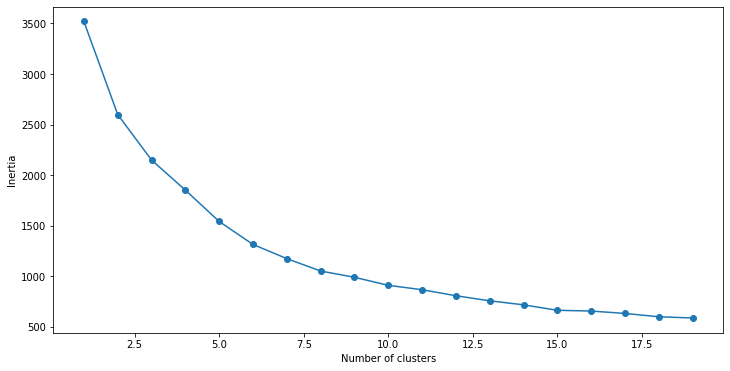

In [52]:

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [53]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans( n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [54]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    210
2    125
1     91
4     10
3      4
Name: cluster, dtype: int64